## Dataset overview

In [ ]:
# !pip install --upgrade pip #upgrade pip package installer
# !pip install scikit-learn --upgrade #upgrade scikit-learn package
# !pip install numpy --upgrade #upgrade numpy package
# !pip install --upgrade matplotlib # Κάνουμε update την matplotlib

In [ ]:
import numpy as np
import csv
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import sys
np.set_printoptions(threshold=sys.maxsize)

# Import the data in a numpy array
# Set mising values symbolized with '?' and 'name' as 'nan'.
data = pd.read_csv('echocardiogram.data', na_values=['?', 'name'], header=None).to_numpy()

* We check for missing values

In [ ]:
print("Random row from data table:", data[49])

# def calculate_rows_with_missing_values(data):
#   samples = data.shape[0]
#   samples_with_missing_values = 0
#   for i in range(samples):
#     if np.isnan(np.sum(data[i])):
#       samples_with_missing_values += 1
#   return samples_with_missing_values

# Count the samples with missing values as features or label
samples = data.shape[0]
samples_with_missing_values = 0
for i in range(samples):
  if np.isnan(data[i,12]):
    samples_with_missing_values += 1
    continue  
  for j in range(10):
    if np.isnan(data[i,j]):
      samples_with_missing_values += 1
      break
    
print('The number of samples with missing values is:', samples_with_missing_values)
missing_percentage = (samples_with_missing_values/samples) * 100 
print('The percentage of samples with missing values is: {:.2f} %'.format(missing_percentage))

Random row from data table: [nan nan 77. nan nan nan nan nan  2. nan nan  2. nan]
The number of samples with missing values is: 71
The percentage of samples with missing values is: 53.79 %


*Check if our dataset is balenced

In [ ]:
count0 = 0
count1 = 0
for i in range(samples):
  if data[i, 12] == 0:
    count0 += 1
  elif data[i, 12] == 1:
    count1 += 1

useful_samples = count0 + count1
print('The percentage of the 0-classification is: {:.2f} %'.format((count0 / useful_samples) * 100))
print('The percentage of the 1-classification is: {:.2f} %'.format((count1 / useful_samples) * 100))

The percentage of the 0-classification is: 67.57 %
The percentage of the 1-classification is: 32.43 %


## Preprocesing

First of all we seperate usefull information features and our labels so as to be compatible with sklearn

In [ ]:
# Keep only the rows with a known output label, discard the rest
filtered_data = data[ ~np.isnan(data[:, 12]) ]

# Separate the important features and the labels
features = filtered_data[:, 2:9]
labels = filtered_data[:, 12]

# Split the data in training and test
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

# Fill in the missing value of the continuous-valued features with the feature's mean value
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train = imputer.fit_transform(train)
test = imputer.transform(test)

 * Processing the data we can deduce that there is some inconsisteny betwwen 1,2 and 13 colums of our dataset. Due to continue our tests we ignore 1,2 colums and we continue with fewer data.

In [ ]:
print('Example of data inconsistency:')
print(data[4])

Example of data inconsistency:
[19.     1.    57.     0.     0.16  22.     5.75  18.     2.25   0.571
    nan  1.     0.   ]


## Classification

### Out-of-the-box Classifiers

In [ ]:
# Save the results here
out_of_the_box_results = np.empty(shape=(4, 2))

#### Dummy

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

clf = DummyClassifier()
clf.fit(train, train_labels)
preds = clf.predict(test)

acc = accuracy_score(test_labels, preds) * 100
f1 = f1_score(test_labels, preds) * 100

out_of_the_box_results[0] = [acc, f1]

print('Out-of-the-box dummy classifier')
print('Accuracy: {:.2f} %'.format(acc))
print('F1-score: {:.2f} %'.format(f1))

Out-of-the-box dummy classifier
Accuracy: 78.26 %
F1-score: 0.00 %


#### Gaussian Naive Bayes (GNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(train, train_labels)
preds = clf.predict(test)

acc = accuracy_score(test_labels, preds) * 100
f1 = f1_score(test_labels, preds) * 100

out_of_the_box_results[1] = [acc, f1]

print('Out-of-the-box Gaussian Naive Bayes classifier')
print('Accuracy: {:.2f} %'.format(acc))
print('F1-score: {:.2f} %'.format(f1))

Out-of-the-box Gaussian Naive Bayes classifier
Accuracy: 78.26 %
F1-score: 61.54 %


#### KNeirestNeighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(train, train_labels)
preds = clf.predict(test)

acc = accuracy_score(test_labels, preds) * 100
f1 = f1_score(test_labels, preds) * 100

out_of_the_box_results[2] = [acc, f1]

print('Out-of-the-box knn classifier')
print('Accuracy: {:.2f} %'.format(acc))
print('F1-score: {:.2f} %'.format(f1))

Out-of-the-box knn classifier
Accuracy: 82.61 %
F1-score: 66.67 %


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train, train_labels)
preds = clf.predict(test)

acc = accuracy_score(test_labels, preds) * 100
f1 = f1_score(test_labels, preds) * 100

out_of_the_box_results[3] = [acc, f1]

print('Out-of-the-box Logistic Regression classifier')
print('Accuracy: {:.2f} %'.format(acc))
print('F1-score: {:.2f} %'.format(f1))

Out-of-the-box Logistic Regression classifier
Accuracy: 78.26 %
F1-score: 61.54 %


#### Συνοπτικά αποτελέσματα

In [ ]:
out_of_the_box_df = pd.DataFrame(out_of_the_box_results,
                                 ['Dummy', 'Gaussian Naive Bayes', 'K Nearest Neighbors', 'Logistic Regression'],
                                 ['Accuracy', 'F1-score'])
out_of_the_box_df

,Accuracy,F1-score
Dummy,78.260870,0.000000
Gaussian Naive Bayes,78.260870,61.538462
K Nearest Neighbors,82.608696,66.666667
Logistic Regression,78.260870,61.538462


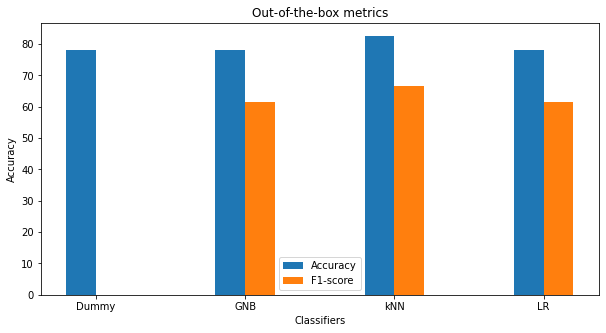

In [ ]:
import matplotlib.pyplot as plt

x = ['Dummy', 'GNB', 'kNN', 'LR']
x_axis = np.arange(len(x))
plt.figure(figsize=(10, 5))
plt.bar(x_axis-0.1, out_of_the_box_results[:, 0], 0.2, label='Accuracy')
plt.bar(x_axis+0.1, out_of_the_box_results[:, 1], 0.2, label='F1-score')

plt.xticks(x_axis, x)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Out-of-the-box metrics')
plt.legend()
plt.show()

The best estimator is Gaussian Naive Bayes. 

### Optimaization

We use cross validation to check every hyperparameter for our model so as to find the best ones. This way we can achive better accuracy and f1 score.

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

selector = VarianceThreshold()
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()

# These are the pipeline architectures I want to test out and optimize
# Afterwards, I will find the best of all of the optimized ones
steps = [
         [],
         [('selector', selector), ('std_scaler', scaler1), ('sampler', ros), ('pca', pca)],
         [('selector', selector), ('minmax_scaler', scaler2), ('sampler', ros), ('pca', pca)],
         [('selector', selector), ('sampler', ros), ('pca', pca)],
         [('selector', selector), ('pca', pca)],
         [('selector', selector)],
         [('selector', selector), ('sampler', ros)],
         [('selector', selector), ('std_scaler', scaler1)],
         [('selector', selector), ('minmax_scaler', scaler2)],
         [('selector', selector), ('std_scaler', scaler1), ('sampler', ros)],
         [('selector', selector), ('std_scaler', scaler1), ('pca', pca)],
         [('selector', selector), ('minmax_scaler', scaler2), ('sampler', ros)],
         [('selector', selector), ('minmax_scaler', scaler2), ('pca', pca)],
         [('scaler', scaler1), ('sampler', ros), ('pca', pca)],
         [('scaler', scaler2), ('sampler', ros), ('pca', pca)],
         [('sampler', ros), ('pca', pca)],
         [('pca', pca)],
         [('sampler', ros)],
         [('std_scaler', scaler1)],
         [('minmax_scaler', scaler2)],
         [('std_scaler', scaler1), ('sampler', ros)],
         [('std_scaler', scaler1), ('pca', pca)],
         [('minmax_scaler', scaler2), ('sampler', ros)],
         [('minmax_scaler', scaler2), ('pca', pca)]
        ]

# Check the variance of our training data to find reasonable values for our selector
train_variance = train.var(axis=0)
print(train_variance)

# Creating the grid of values that i will use to optimize the above architectures
vthreshold = [0, 5, 50]
n_components = [2, 4, 6]
tf = [True, False]

# My metrics to be used
metrics = ['accuracy', 'f1']

[6.79204315e+01 1.69165705e-01 1.37538462e-02 4.76639817e+01
 6.39964884e-01 3.19090642e+01 1.97260392e-01]


In [ ]:
myBestEstimators = []

#### Dummy

In [ ]:
clf = DummyClassifier()

for method in metrics:
  scores = []
  estimators = []

  for i in range(len(steps)):
    # Construct the pipe with the specific architecture for this classifier
    mySteps = steps[i][:]
    mySteps.append(('dummy', clf))
    pipe = Pipeline(steps=mySteps, memory='tmp')

    # Construct a temporary dictionary with only the values needed for this pipe
    myDictionary = {'dummy__strategy': ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']}
    for element in mySteps:
      name = element[0]
      if name == 'selector':
        myDictionary['selector__threshold'] = vthreshold
      elif name == 'pca':
        myDictionary['pca__n_components'] = n_components
      elif name == 'std_scaler':
        myDictionary['std_scaler__with_mean'] = tf
        myDictionary['std_scaler__with_std'] = tf

    estimator = GridSearchCV(pipe, myDictionary, cv=10, scoring=method, n_jobs=-1)
   
    # Find the optimal model for this pipeline architecture
    estimator.fit(train, train_labels)

    scores.append(estimator.best_score_)
    estimators.append(estimator.best_estimator_)

  max_score = max(scores)
  max_index = scores.index(max_score)
  max_estimator = estimators[max_index]

  myBestEstimators.append(max_estimator)

  print('Optimal estimator for metric {} is:\n{}'.format(method, max_estimator))
  print('with score: {:.2f} %'.format(max_score * 100))

Optimal estimator for metric accuracy is:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler(with_std=False)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=2)),
                ('dummy', DummyClassifier(strategy='stratified'))])
with score: 69.00 %
Optimal estimator for metric f1 is:
Pipeline(memory='tmp',
         steps=[('std_scaler', StandardScaler(with_mean=False, with_std=False)),
                ('dummy', DummyClassifier(strategy='uniform'))])
with score: 61.33 %


#### Gaussian Naive Bayes (GNB)

In [ ]:
clf = GaussianNB()

for method in metrics:
  scores = []
  estimators = []

  for i in range(len(steps)):
    # Construct the pipe with the specific architecture for this classifier
    mySteps = steps[i][:]
    mySteps.append(('GNB', clf))
    pipe = Pipeline(steps=mySteps, memory='tmp')

    # Construct a temporary dictionary with only the values needed for this pipe
    myDictionary = {'GNB__var_smoothing': np.logspace(-9, 0)}
    for element in mySteps:
      name = element[0]
      if name == 'selector':
        myDictionary['selector__threshold'] = vthreshold
      elif name == 'pca':
        myDictionary['pca__n_components'] = n_components
      elif name == 'std_scaler':
        myDictionary['std_scaler__with_mean'] = tf
        myDictionary['std_scaler__with_std'] = tf

    estimator = GridSearchCV(pipe, myDictionary, cv=10, scoring=method, n_jobs=-1)
   
    # Find the optimal model for this pipeline architecture
    estimator.fit(train, train_labels)

    scores.append(estimator.best_score_)
    estimators.append(estimator.best_estimator_)

  max_score = max(scores)
  max_index = scores.index(max_score)
  max_estimator = estimators[max_index]

  myBestEstimators.append(max_estimator)

  print('Optimal estimator for metric {} is:\n{}'.format(method, max_estimator))
  print('with score: {:.2f} %'.format(max_score * 100))

Optimal estimator for metric accuracy is:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=6)),
                ('GNB', GaussianNB(var_smoothing=1.0))])
with score: 80.00 %
Optimal estimator for metric f1 is:
Pipeline(memory='tmp',
         steps=[('minmax_scaler', MinMaxScaler()),
                ('sampler', RandomOverSampler()),
                ('GNB', GaussianNB(var_smoothing=0.07906043210907701))])
with score: 71.00 %


#### KNeirestNeighbors (kNN)

In [ ]:
clf = KNeighborsClassifier(n_jobs=-1)

for method in metrics:
  scores = []
  estimators = []

  for i in range(len(steps)):
    # Construct the pipe with the specific architecture for this classifier
    mySteps = steps[i][:]
    mySteps.append(('knn', clf))
    pipe = Pipeline(steps=mySteps, memory='tmp')

    # Construct a temporary dictionary with only the values needed for this pipe
    myDictionary = {
        'knn__n_neighbors': [3, 9, 17],
        'knn__weights': ['uniform', 'distance'],
        # 'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'knn__p': [1, 2, 3]
    }
    for element in mySteps:
      name = element[0]
      if name == 'selector':
        myDictionary['selector__threshold'] = vthreshold
      elif name == 'pca':
        myDictionary['pca__n_components'] = n_components
      elif name == 'std_scaler':
        myDictionary['std_scaler__with_mean'] = tf
        myDictionary['std_scaler__with_std'] = tf

    estimator = GridSearchCV(pipe, myDictionary, cv=10, scoring=method, n_jobs=-1)
   
    # Find the optimal model for this pipeline architecture
    estimator.fit(train, train_labels)

    scores.append(estimator.best_score_)
    estimators.append(estimator.best_estimator_)

  max_score = max(scores)
  max_index = scores.index(max_score)
  max_estimator = estimators[max_index]

  myBestEstimators.append(max_estimator)

  print('Optimal estimator for metric {} is:\n{}'.format(method, max_estimator))
  print('with score: {:.2f} %'.format(max_score * 100))

Optimal estimator for metric accuracy is:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler(with_mean=False)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=17, p=3))])
with score: 84.00 %
Optimal estimator for metric f1 is:
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler(with_mean=False)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=17, p=3))])
with score: 78.00 %


#### Logistic Regression

In [ ]:
clf = LogisticRegression(n_jobs=-1)

for method in metrics:
  scores = []
  estimators = []

  for i in range(len(steps)):
    # Construct the pipe with the specific architecture for this classifier
    mySteps = steps[i][:]
    mySteps.append(('LR', clf))
    pipe = Pipeline(steps=mySteps, memory='tmp')

    # Construct a temporary dictionary with only the values needed for this pipe
    myDictionary = {
        # 'LR__tol': [1e-5, 1e-4, 1e-3],
        # 'LR__fit_intercept': tf,
        'LR__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'LR__max_iter': [50, 100, 200],
        'LR__warm_start': tf
    }
    for element in mySteps:
      name = element[0]
      if name == 'selector':
        myDictionary['selector__threshold'] = vthreshold
      elif name == 'pca':
        myDictionary['pca__n_components'] = n_components
      elif name == 'std_scaler':
        myDictionary['std_scaler__with_mean'] = tf
        myDictionary['std_scaler__with_std'] = tf

    estimator = GridSearchCV(pipe, myDictionary, cv=10, scoring=method, n_jobs=-1)
   
    # Find the optimal model for this pipeline architecture
    estimator.fit(train, train_labels)

    scores.append(estimator.best_score_)
    estimators.append(estimator.best_estimator_)

  max_score = max(scores)
  max_index = scores.index(max_score)
  max_estimator = estimators[max_index]

  myBestEstimators.append(max_estimator)
  
  print('Optimal estimator for metric {} is:\n{}'.format(method, max_estimator))
  print('with score: {:.2f} %'.format(max_score * 100))

Optimal estimator for metric accuracy is:
Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=2)),
                ('LR',
                 LogisticRegression(max_iter=50, n_jobs=-1, solver='liblinear',
                                    warm_start=True))])
with score: 80.00 %
Optimal estimator for metric f1 is:
Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=6)),
                ('LR',
                 LogisticRegression(max_iter=50, n_jobs=-1, solver='newton-cg',
                                    warm_start=True))])
with score: 74.00 %


## Results

In [ ]:
import time

finalResults = np.empty(shape=(8, 6))

for i, est in enumerate(myBestEstimators):
  # Fit the model using train data and predict on test data
  # Also time the 2 processes
  fit_start = time.time()
  est.fit(train, train_labels)
  fit_end = time.time()

  finalResults[i, 4] = fit_end - fit_start

  predict_start = time.time()
  preds = est.predict(test)
  predict_end = time.time()

  finalResults[i, 5] = predict_end - predict_start

  # Save the accuracy and f1 scores
  acc = accuracy_score(test_labels, preds) * 100
  f1 = f1_score(test_labels, preds) * 100

  finalResults[i, 0] = acc
  finalResults[i, 2] = f1

  finalResults[i, 1] = acc - out_of_the_box_results[i//2, 0]
  finalResults[i, 3] = f1 - out_of_the_box_results[i//2, 1]

results_df = pd.DataFrame(finalResults,
                          ['Dummy_Acc', 'Dummy_F1', 'GNB_Acc', 'GNB_F1', 'kNN_Acc', 'kNN_F1', 'LR_Acc', 'LR_F1'],
                          ['Accuracy', 'Accuracy Improvement', 'F1-score', 'F1_score Improvement', 'Fit Time', 'Predict Time'])
results_df

,Accuracy,Accuracy Improvement,F1-score,F1_score Improvement,Fit Time,Predict Time
Dummy_Acc,34.782609,-43.478261,11.764706,11.764706,0.007687,0.000536
Dummy_F1,56.521739,-21.739130,28.571429,28.571429,0.002713,0.000265
GNB_Acc,82.608696,4.347826,66.666667,5.128205,0.007908,0.000591
GNB_F1,78.260870,0.000000,61.538462,0.000000,0.005103,0.000342
kNN_Acc,73.913043,-8.695652,50.000000,-16.666667,0.007397,0.103895
kNN_F1,73.913043,-8.695652,50.000000,-16.666667,0.008386,0.104260
LR_Acc,73.913043,-4.347826,57.142857,-4.395604,0.007478,0.000405
LR_F1,82.608696,4.347826,66.666667,5.128205,0.294469,0.000666


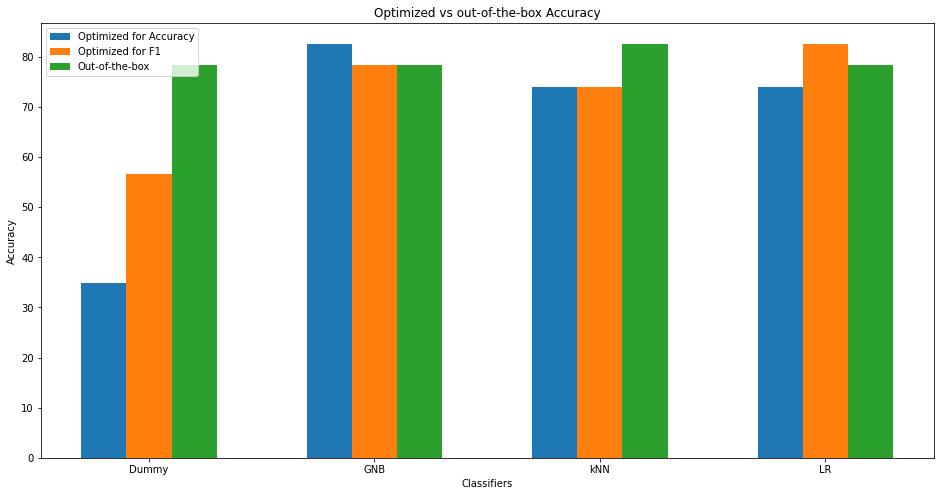

In [ ]:
# Accuracy

x = ['Dummy', 'GNB', 'kNN', 'LR']
x_axis = np.arange(len(x))

finalAcc = []
finalf1 = []

for i in range(8):
  if i % 2 == 0:
    finalAcc.append(finalResults[i][0])
  else:
    finalf1.append(finalResults[i][0])

plt.figure(figsize=(16, 8))

plt.bar(x_axis-0.2, finalAcc, 0.2, label='Optimized for Accuracy')
plt.bar(x_axis, finalf1, 0.2, label='Optimized for F1')
plt.bar(x_axis+0.2, out_of_the_box_results[:, 0], 0.2, label='Out-of-the-box')

plt.xticks(x_axis, x)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Optimized vs out-of-the-box Accuracy')
plt.legend()
plt.show()

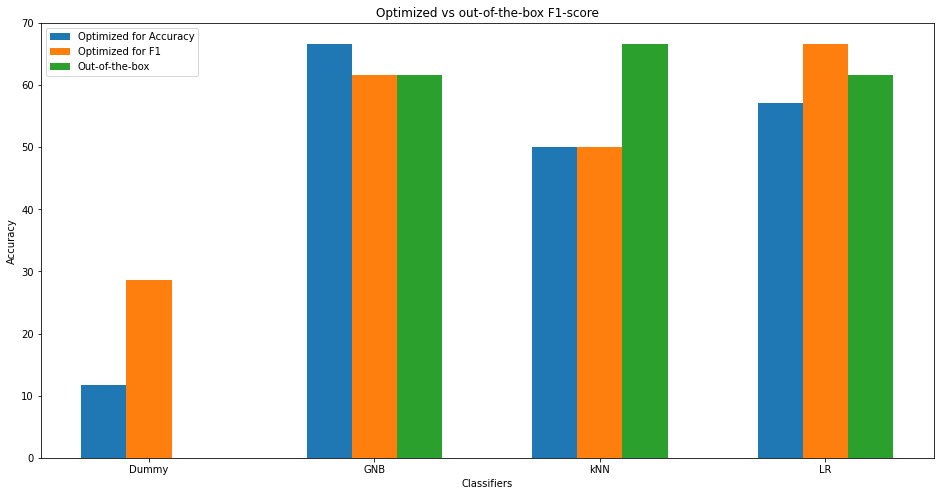

In [ ]:
# F1-score

x = ['Dummy', 'GNB', 'kNN', 'LR']
x_axis = np.arange(len(x))

finalAcc = []
finalf1 = []

for i in range(8):
  if i % 2 == 0:
    finalAcc.append(finalResults[i][2])
  else:
    finalf1.append(finalResults[i][2])

plt.figure(figsize=(16, 8))

plt.bar(x_axis-0.2, finalAcc, 0.2, label='Optimized for Accuracy')
plt.bar(x_axis, finalf1, 0.2, label='Optimized for F1')
plt.bar(x_axis+0.2, out_of_the_box_results[:, 1], 0.2, label='Out-of-the-box')

plt.xticks(x_axis, x)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Optimized vs out-of-the-box F1-score')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Find best and worst estimator excluding dummy
newBestEstimators = myBestEstimators[2::]
accuracyScores = finalResults[2::, 0].tolist()

max_score = max(accuracyScores)
min_score = min(accuracyScores)

maxAccEstimator = newBestEstimators[accuracyScores.index(max_score)]
minAccEstimator = newBestEstimators[accuracyScores.index(min_score)]

maxAccEstimator.fit(train, train_labels)
preds = maxAccEstimator.predict(test)
conf1 = confusion_matrix(test_labels, preds)

minAccEstimator.fit(train, train_labels)
preds = minAccEstimator.predict(test)
conf2 = confusion_matrix(test_labels, preds)

In [ ]:
# Heatmap Visualization Parameters
def visualize_confusion_matrix(conf):
  group_names = ['Correctly dead', 'Predicted alive while dead', 'Predicted dead while alive', 'Correctly alive']
  group_counts = [value for value in conf.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in conf.flatten() / np.sum(conf)]

  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2, 2)

  sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=6)),
                ('GNB', GaussianNB(var_smoothing=1.0))])


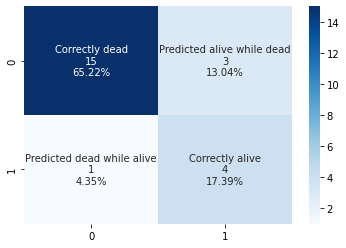

In [ ]:
print(maxAccEstimator)
visualize_confusion_matrix(conf1)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('std_scaler', StandardScaler(with_mean=False)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=2)),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=17, p=3))])


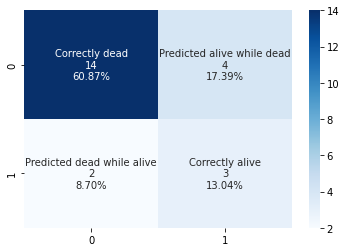

In [ ]:
print(minAccEstimator)
visualize_confusion_matrix(conf2)

We can observe significant differences bettween F1-score and accuracy due to small data volume.